### Abordagem de ensenmble machine learning dos dados de recem nascidos vivos do sinasc datasus SAO PAULO
### Machine Learning Ensenble approach of SINASC DATASUS SAO PAULO data from newborn alive

Workflow stages 

-Question or problem definition

-Import Data

-Wrangle, prepare, cleanse the data.

-Model, predict and solve the problem.

-Visualize and report


### Question or Problem Definition

Here we have a dataset from DATASUS, that is an government database from brazillian public health. This dataset is concern about alive newborns and gather data about the socioeconomic and health features surrounding this newborn.

Our target is related to the weight of the newborn, we want to predict wheater the baby will be born with BPN ( Baixo Peso ao Nascer -  Low birthweight ), which is below 2000 grams.

With this data we want to build a machine learning model to predict rather the baby will be born below the threshold weight for health prediction issues.

### Import Data

In [1]:
import pandas as pd
import numpy as np

#dn_2010 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2010.csv')
#dn_2011 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2011.csv')
#dn_2012 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2012.csv')
#dn_2013 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2013.csv')
dn_2014 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2014.csv')
dn_2015 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2015.csv')
dn_2016 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2016.csv')
dn_2017 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2017.csv')
dn_2018 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2018.csv')
dn_2019 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2019.csv')
dn_2020 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2020.csv')

C:\Users\Nathan\AppData\Local\Temp\ipykernel_20792\3429445034.py:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  dn_2014 = pd.read_csv(r'C:\Users\Nathan\Documents\TCC\tabwin\TAB415\DNSPCSV\DNSP2014.csv')


In [2]:
# creating 'ANO' ( YEAR ) feature to make it easier for future process.
dn_2014['ANO'] = 2014
dn_2015['ANO'] = 2015
dn_2016['ANO'] = 2016
dn_2017['ANO'] = 2017
dn_2018['ANO'] = 2018
dn_2019['ANO'] = 2019
dn_2020['ANO'] = 2020

In [3]:
# grouping the datasets from all years in one
df = pd.concat([dn_2014,dn_2015,dn_2016,dn_2017,dn_2018,dn_2019,dn_2020],ignore_index=True)

Before anything let's start taking a quick look on our target, for that we going to create a feature to tell us when or not the baby is on BPN.

C:\Users\Nathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 Peso (Weight) < 2500 gramas :  386127
 Peso (Weight) > 2500 gramas :  3828345
 Abaixo do Peso (Below Loweight) % :  9.161930604830214
 Peso Normal ( Normal weight ) % :  90.83806939516978


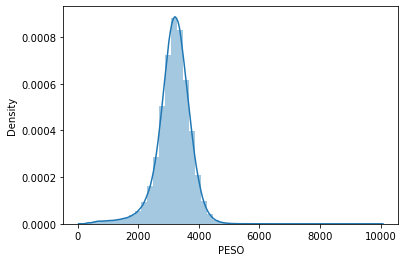

In [8]:
df = df[df['PESO'].notna()]    # dropar se PESO estiver faltando
df['PESO'] = df['PESO'].astype(int)

import seaborn as sns
sns.distplot(df['PESO'])
df['BPN'] = df['PESO'].apply(lambda x: 1 if x < 2500 else 0)
print(' Peso (Weight) < 2500 gramas : ', len(df[df['BPN'] == 1]))
print(' Peso (Weight) > 2500 gramas : ', len(df[df['BPN'] == 0]))
print(' Abaixo do Peso (Below Loweight) % : ', (len(df[df['BPN'] == 1])/len(df)) * 100)
print(' Peso Normal ( Normal weight ) % : ', (len(df[df['BPN'] == 0])/len(df)) * 100)

We know now that the rate for low birthweight is 9.16%, is good to keep in mind that this is a case of imbalanced data, which we have to consider when we get to the modelling part.

### Wrangle, Prepare, Cleanse Data

For starters this is the features that the dataset have and we will work on 

• DTNASC – Data do nascimento;  dd mm aaaa (birthdate)

• HORANASC – Horário do nascimento do recém-nascido; (birth hour)

• SEXO – Sexo do recém-nascido; Sexo: M – Masculino; F – Feminino; I – ignorado (sex)

• RACACOR – Cor ou raça do recém-nascido; Tipo de raça e cor do nascido: 1– Branca; 2– Preta; 3– Amarela;
4– Parda; 5– Indígena. (race)

• *PESO – Peso em gramas verificado até a 5ª hora após o nascimento;  EM GRAMAS* Variavel a ser Analisada como saida (Weight)

• APGAR1 – Valor do índice de Apgar, medido no 1º minuto de vida; pontuacao de 0 a 10

• APGAR5 – Valor do índice Apgar, medido no 5º minuto de vida; pontuacao de 0 a 10

• IDANOMAL – Anomalia congênita identificada no momento do nascimento;  Anomalia identificada: 1– Sim; 2– Não; 9– Ignorado (Identified congenital anomaly)

• LOCNASC – Local onde ocorreu o nascimento; Local de nascimento: 1 – Hospital; 2 – Outros estabelecimentos
de saúde; 3 – Domicílio; 4 – Outros ( birht location )

• CODESTAB – Código do Cadastro Nacional de estabelecimento onde ocorreu o nascimento; ... (establishment code)

• CODMUNNASC – Código de município de nascimento; ... (birthtown code)

• ESCMAE – Escolaridade, em anos de estudo concluídos. Código agregado da escolaridade
da mãe para o modelo antigo da DN; Escolaridade, em anos de estudo concluídos: 1 – Nenhuma; 2 –
1 a 3 anos; 3 – 4 a 7 anos; 4 – 8 a 11 anos; 5 – 12 e mais; 9 – Ignorado. ( mother scholarship)

• ESCMAE2010 – Escolaridade 2010; Escolaridade 2010. Valores: 0 – Sem escolaridade; 1 –
Fundamental I (1ª a 4ª série); 2 – Fundamental II (5ª a 8ª série); 
3 – Médio (antigo 2º Grau); 4 – Superior incompleto; 5 –
Superior completo; 9 – Ignorado. (mother scholarship 2010) 

• SERIESCMAE – Série escolar da mãe; Série escolar da mãe. Valores de 1 a 8 ( related to mother scholarship)

• CODOCUPMAE – Código de ocupação da mãe conforme tabela do CBO (Código Brasileiro de Ocupações; Código de ocupação da mãe conforme tabela do CBO (Código
Brasileiro de Ocupações). ... (mother's occupation code)

• DTNASCMAE – Data de nascimento da mãe; Data de nascimento da mãe: dd mm aaaa (mother's birthdate)

• IDADEMAE – Idade da mãe; ... (mother's age)

• NATURALMAE – Se a mãe for estrangeira, constará o código do país de nascimento; Se a mãe for estrangeira, constará o código do país de
nascimento. (mother's naturality)

• ESTCIVMAE – Situação conjugal da mãe; Situação conjugal da mãe: 1– Solteira; 2– Casada; 3– Viúva; 4–
Separada judicialmente/divorciada; 5– União estável; 9–
Ignorada. (mother's civil state)

• RACACORMAE – Tipo de raça e cor da mãe; Tipo de raça e cor da mãe: 1– Branca; 2– Preta; 3– Amarela; 4–
Parda; 5– Indígena. (mother's race)

• CODMUNRES – Código do município de residência; ... (mother's town residence code)

• IDADEPAI – Idade do pai; ... (father's age)

• QTDGESTANT – Número de gestações anteriores; ... ( gestation quantity )

• QTDPARTNOR – Número de partos vaginais; ... ( normal childbirth quantity )

• QTDPARTCES – Número de partos cesáreos; ... ( cesarean childbirth quantity )

• QTDFILVIVO – Número de filhos vivos; ... ( number of alive children)

• QTDFILMORT – Número de perdas fetais e abortos; ( number of fetal losses or abortions )

• DTULTMENST – Data da última menstruação (DUM);  dd mm aaaa ( date of last menstruation )

• GESTACAO – Semanas de gestação agrupado; ... ( weeks of gestation - grouped)

• SEMAGESTAC – Número de semanas de gestação; ... ( number of weeks of gestation )

• TPMETESTIM – Método utilizado para verificar nº de semanas de gestação;  Método utilizado. Valores: 1– Exame físico; 2– Outro método;
9– Ignorado.  ( method for verifing gestation weeks number )

• CONSULTAS – Número de consultas de pré-natal agrupada;  Valores: 1– Nenhuma; 2– de
1 a 3; 3– de 4 a 6; 4– 7 e mais; 9– Ignorado. ( number of pre-birth appointments )

• CONSPRENAT – Número de consultas pré-natal por semana de gestação; ... ( number of pre-birth appointments for gestation week)

• MESPRENAT – Mês de gestação em que iniciou o pré natal; ... ( gestation month that began the pre-birth appointments )

• GRAVIDEZ – Tipo de gravidez; Tipo de gravidez: 1– Única; 2– Dupla; 3– Tripla ou mais; 9–
Ignorado. ( type of pregnancy )

• TPAPRESENT – Tipo de apresentação do RN; Tipo de apresentação do RN. Valores: 1– Cefálico; 2– Pélvica ou
podálica; 3– Transversa; 9– Ignorado. ( fetal presentation and position )

• STTRABPART – Questionamento sobre indução do trabalho de parto; Trabalho de parto induzido? Valores: 1– Sim; 2– Não; 3– Não
se aplica; 9– Ignorado.  ( question about labor induction )

• PARTO – Tipo de parto; Tipo de parto: 1– Vaginal; 2– Cesário; 9– Ignorado  ( type of labor )

• STCESPARTO – Cesárea ocorreu antes do trabalho de parto iniciar; Cesárea ocorreu antes do trabalho de parto iniciar? Valores: 1–
Sim; 2– Não; 3– Não se aplica; 9– Ignorado. ( if cesarean begun before or after labor )


• TPNASCASSI – Formação da pessoa que assistiu ao parto. Em partos assistidos por
equipe multiprofissional, formação da pessoa que coordenou os trabalhos; Nascimento foi assistido por? Valores: 1– Médico; 2–
Enfermeira/obstetriz; 3– Parteira; 4– Outros; 9– Ignorado. (type of formation of the person who attended the birth )


• CODANOMAL – Descrição completa da anomalia congênita identificada no momento do
nascimento, segundo a CID 10; (congenital anomaly code, by CID 10)

• DTDECLARAC – Data do preenchimento da declaração; dd mm aaaa (date of fillingof the declaration)

• TPFUNCRESP – Funcao do responsável pelo preenchimento da declaração; Tipo de função do responsável pelo preenchimento. Valores:
1– Médico; 2– Enfermeiro; 3– Parteira; 4– Funcionário do
cartório; 5– Outros. (function of the responsible for the declaration)

• TPDOCRESP – Tipo de documento do responsável pelo preenchimento da declaração; Tipo do documento do responsável. Valores: 1‐CNES; 2‐CRM; 3‐
COREN; 4‐RG; 5‐CPF. ( type of document of the responsible for the declaration)

• ESCMAEAGR1 – Escolaridade 2010 agregada; Escolaridade 2010 agregada. Valores: 00 – Sem Escolaridade;
01 – Fundamental I Incompleto; 02 – Fundamental I Completo;
03 – Fundamental II Incompleto; 04 – Fundamental II
Completo; 05 – Ensino Médio Incompleto; 06 – Ensino Médio
Completo; 07 – Superior Incompleto; 08 – Superior Completo;
09 – Ignorado; 10 – Fundamental I Incompleto ou Inespecífico;
11 – Fundamental II Incompleto ou Inespecífico; 12 – Ensino
Médio Incompleto ou Inespecífico.  ( mother's scholarship)

• STDNEPIDEM – Status de DN Epidemiológica; Status de DO Epidemiológica. Valores: 1 – SIM; 0 – NÃO. ( status of epidemiological from News Diary )

• STDNNOVA – Status de DN Nova; Status de DO Nova. Valores: 1 – SIM; 0 – NÃO. ( Status of Nova from New sDiary )

• CODPAISRES – Código do país de residência; ... ( Country of residence code )

• TPROBSON – Código do Grupo de Robson, gerado pelo sistema; ... (Robson group code )
 
• PARIDADE – Variável calculada pelo sistema; ...* not found on dictionary ( Parity )

• KOTELCHUCK – Códigos de classificação de adequação ao pré natal, gerado pelo (KOTELCHUCK)
sistema; ...* not found on dictionary

• CODUFNATU – Código da UF de naturalidade da mãe; ... ( Mother' natural state Code )

• CODMUNNATU – Código do município de naturalidade da mãe; ... ( Mothers natural town code )

• DTRECORIGA – Data de recebimento original calculado pelo sistema; ...* not found ( Original date calculated by the system )

• DIFDATA – Diferença entre a data de óbito e data do recebimento original da DO ([DTNASC] – [DTRECORIG]); ( difference between date of death and received)

• DTRECEBIM – Data do último recebimento do lote, dada pelo Sisnet; ... ( date of the last data package from system)

• VERSAOSIST – Versão do sistema; ( system version )

• NUMEROLOTE – Número do lote; ( number of the package )

• DTCADASTRO – Data do cadastro da DN no sistema; ( registration on news diary date )

• ORIGEM – Banco de dados de origem; ( origin of database )

Let's see which features has the most NaN values, so we may consider dropping them.

#### Missing values analyses

In [9]:
isnull = df.isnull().sum() 

In [10]:
isnull.sort_values(ascending = False).head(40)

CODANOMAL     4161815
DTRECORIGA    3614212
CONTADOR      2472860
DTULTMENST    2379945
IDADEPAI      2022781
CODPAISRES    1872600
contador      1741612
SERIESCMAE    1441932
CODOCUPMAE     960741
STCESPARTO     524099
CODUFNATU       69990
CODMUNNATU      69990
NATURALMAE      68829
QTDFILMORT      65105
QTDPARTNOR      64818
QTDPARTCES      59415
MESPRENAT       44680
RACACORMAE      41840
QTDGESTANT      39789
QTDFILVIVO      39010
TPFUNCRESP      36331
TPMETESTIM      35116
RACACOR         32616
DTDECLARAC      26862
CONSPRENAT      23984
STTRABPART      22957
ESCMAE2010      19893
ESCMAEAGR1      19893
CODESTAB        17388
TPAPRESENT      16829
DTNASCMAE       16725
APGAR1          15151
APGAR5          14321
TPNASCASSI      13827
ESTCIVMAE       13641
SEMAGESTAC      12998
GESTACAO        12182
TPDOCRESP       11981
ESCMAE          10435
IDANOMAL         6639
dtype: int64

#### Getting features correlation with the target 

In [11]:
corr_matrix = df.corr().abs() # getting the correlation in positive numbers 
print(corr_matrix["BPN"].sort_values(ascending=False))

BPN           1.000000
PESO          0.664543
SEMAGESTAC    0.530659
GESTACAO      0.527347
TPROBSON      0.388847
GRAVIDEZ      0.292629
CONSULTAS     0.122735
APGAR1        0.072558
KOTELCHUCK    0.070574
TPAPRESENT    0.060009
APGAR5        0.050317
CONSPRENAT    0.040186
STTRABPART    0.034793
MESPRENAT     0.034260
QTDFILMORT    0.031548
PARTO         0.025253
TPNASCASSI    0.020883
LOCNASC       0.019545
PARIDADE      0.019162
QTDPARTCES    0.018817
SERIESCMAE    0.018339
TPMETESTIM    0.017706
ESCMAE        0.017466
STCESPARTO    0.016709
QTDPARTNOR    0.016396
ESCMAE2010    0.016105
IDANOMAL      0.015716
IDADEMAE      0.014276
QTDGESTANT    0.013867
IDADEPAI      0.012652
ESCMAEAGR1    0.012151
DIFDATA       0.010891
CODMUNNATU    0.010549
CODOCUPMAE    0.010379
CODUFNATU     0.010348
NATURALMAE    0.010131
ESTCIVMAE     0.005921
TPDOCRESP     0.005065
DTRECEBIM     0.004898
CODESTAB      0.004725
RACACOR       0.003790
RACACORMAE    0.003696
TPFUNCRESP    0.003593
DTRECORIGA 


#### Some feature that wont help us i will drop for process effiencience.

 ORIGEM, because of the low corr and lack of apparently concept corr
 
 CODPAISRES because dont interest me other country other than brasil, because we are approaching only cases of State of Sao Paulo
 
 VERSAOSIST version of the sistem not important
 
 DTRECORIGA date of document received not important
 
 CODANOMAL has a lot of NAN values but it still can be relevant, so before drop it i will create a hasFeature feature.
 
 CONTADOR and contador is just the counter of the data, so i will drop it 
 
 CODEESTAB because is jsut the code of the establishment the newborn was born
 
 NUMEROLOTE also because is just related to the package that the data was saved
 
 All Dates features with the exception of DTNASC because it might be useful get the months out of it, thinking that maybe season might have implicit interference


In [12]:
# creating hasFeature type of feature to save the value of it was a missing value or not
df['hasDTRECORIGA'] = np.where(df['DTRECORIGA'].notnull(),1,0) 
df['hasCODANOMAL'] = np.where(df['CODANOMAL'].notnull(),1,0)
df['hasCODESTAB'] = np.where(df['CODESTAB'].notnull(),1,0)
df['hasNUMEROLOTE'] = np.where(df['CODESTAB'].notnull(),1,0)
df['hasDTULTMENST'] = np.where(df['DTULTMENST'].notnull(),1,0)
df['hasIDADEPAI'] = np.where(df['IDADEPAI'].notnull(),1,0) # substitute by the mode
df['hasSERIESCMAE'] = np.where(df['SERIESCMAE'].notnull(),1,0) # substitute by the mode
df['hasCODOCUPMAE'] = np.where(df['CODOCUPMAE'].notnull(),1,0)

df['hasHORANASC'] = np.where(df['HORANASC'].notnull(),1,0)
df['hasDTCADASTRO'] = np.where(df['DTCADASTRO'].notnull(),1,0)
df['hasDTRECEBIM'] = np.where(df['DTRECEBIM'].notnull(),1,0)
df['hasDTNASCMAE'] = np.where(df['DTNASCMAE'].notnull(),1,0)
df['hasDTDECLARAC'] = np.where(df['DTDECLARAC'].notnull(),1,0)


In [13]:
df.drop(['ORIGEM','CODPAISRES','VERSAOSIST','DTRECORIGA','CONTADOR','CODESTAB','NUMEROLOTE','contador','HORANASC',
         'DTCADASTRO','DTRECEBIM','DTULTMENST','DTNASCMAE','DTDECLARAC'],axis=1,inplace=True)

After creating the hasFeatures and dropping the selected columns, is necessary to change the features to the right type and fill in the NaN values

We will do it mostly be replacing quantitative features with the mode, and filling the 'ignored' option for the features we can.

In [14]:
df['PESO'] = df['PESO'].astype(int)

df['CODMUNNASC'] = df['CODMUNNASC'].astype(int)
df['LOCNASC'] = df['LOCNASC'].astype(int)

df['IDADEMAE'].fillna(df['IDADEMAE'].mode()[0],inplace=True)
df['IDADEMAE'] = df['IDADEMAE'].astype(int)

df['ESTCIVMAE'].fillna(9,inplace=True)
df['ESTCIVMAE'] = df['ESTCIVMAE'].astype(int)

df['ESCMAE'].fillna(9,inplace=True)
df['ESCMAE'] = df['ESCMAE'].astype(int)

df['CODOCUPMAE'].fillna(9,inplace=True)
df['CODOCUPMAE'] = df['CODOCUPMAE'].astype(int)

df['QTDFILVIVO'].fillna(0,inplace=True)
df['QTDFILVIVO'] = df['QTDFILVIVO'].astype(int)

df['QTDFILMORT'].fillna(0,inplace=True)
df['QTDFILMORT'] = df['QTDFILMORT'].astype(int)

df['CODMUNRES'] = df['CODMUNRES'].astype(int)

df['GESTACAO'].fillna(9,inplace=True)
df['GESTACAO'] = df['GESTACAO'].astype(int)

df['GRAVIDEZ'].fillna(9,inplace=True)
df['GRAVIDEZ'] = df['GRAVIDEZ'].astype(int)

df['PARTO'].fillna(9,inplace=True)
df['PARTO'] = df['PARTO'].astype(int)


df['CONSULTAS'].fillna(9,inplace=True) # filling with 9, with stands for ignored
df['CONSULTAS'] = df['CONSULTAS'].astype(int)

# replacing 'M' and 'F' for the respective number of the same meaning 
def condition(x):
    if x=='M' or x==1:
        return 1
    elif x=='F' or x==2:
        return 2
    else:
        return 0
df['SEXO'] = df['SEXO'].apply(condition)
df['SEXO'].fillna(0,inplace=True) # filling for 0, which stands for ignored
df['SEXO'] = df['SEXO'].astype(int)

df['APGAR1'].fillna(99,inplace=True)
df['APGAR1'] = df['APGAR1'].astype(int)

df['APGAR5'].fillna(99,inplace=True)
df['APGAR5'] = df['APGAR5'].astype(int)

df['RACACOR'].fillna(9,inplace=True)
df['RACACOR'] = df['RACACOR'].astype(int)

df['PESO'] = df['PESO'].astype(int)

df['IDANOMAL'].fillna(9,inplace=True)
df['IDANOMAL'] = df['IDANOMAL'].astype(int)

df['DIFDATA'].fillna(df['DIFDATA'].mode()[0],inplace=True)
df['DIFDATA'] = df['DIFDATA'].astype(int)

df['NATURALMAE'].fillna(835,inplace=True) # substituindo pela moda
df['NATURALMAE'] = df['NATURALMAE'].astype(int)

df['CODMUNNATU'].fillna(99,inplace=True)
df['CODMUNNATU'] = df['CODMUNNATU'].astype(int)

df['CODUFNATU'].fillna(99,inplace=True)
df['CODUFNATU'] = df['CODUFNATU'].astype(int)

df['ESCMAE2010'].fillna(99,inplace=True)
df['ESCMAE2010'] = df['ESCMAE2010'].astype(int)

df['hasSERIESCMAE'] = df['SERIESCMAE'].apply(lambda x: 1 if x > 0 else 0)

df['SERIESCMAE'].fillna(9,inplace=True)
df['SERIESCMAE'] = df['SERIESCMAE'].astype(int)

df['RACACORMAE'].fillna(9,inplace=True)
df['RACACORMAE'] = df['RACACORMAE'].astype(int)

df['QTDGESTANT'].fillna(0,inplace=True) # substituindo pela moda
df['QTDGESTANT'] = df['QTDGESTANT'].astype(int)

df['QTDPARTCES'].fillna(0,inplace=True) # substituindo pela moda
df['QTDPARTCES'] = df['QTDPARTCES'].astype(int)

df['hasIDADEPAI'] = df['IDADEPAI'].apply(lambda x: 1 if x > 0 else 0)

df['IDADEPAI'].fillna(df['IDADEPAI'].mode()[0],inplace=True)
df['IDADEPAI'] = df['IDADEPAI'].astype(int)


df['MESPRENAT'].fillna(99,inplace=True)
df['MESPRENAT'] = df['MESPRENAT'].astype(int)

df['TPAPRESENT'].fillna(9,inplace=True)
df['TPAPRESENT'] = df['TPAPRESENT'].astype(int)

df['STTRABPART'].fillna(9,inplace=True)
df['STTRABPART'] = df['STTRABPART'].astype(int)

df['STCESPARTO'].fillna(9,inplace=True)
df['STCESPARTO'] = df['STCESPARTO'].astype(int)

df['TPNASCASSI'].fillna(9,inplace=True)
df['TPNASCASSI'] = df['TPNASCASSI'].astype(int)

df['TPFUNCRESP'].fillna(9,inplace=True)
df['TPFUNCRESP'] = df['TPFUNCRESP'].astype(int)


df['STDNEPIDEM'].fillna(df['STDNEPIDEM'].mode()[0],inplace=True) # filling the nans with the mode
df['STDNEPIDEM'] = df['STDNEPIDEM'].astype(int)

df['STDNNOVA'].fillna(df['STDNNOVA'].mode()[0],inplace=True) # filling the nans with the mode
df['STDNNOVA'] = df['STDNNOVA'].astype(int)

df['TPROBSON'] = df['TPROBSON'].astype(int)
df['PARIDADE'] = df['PARIDADE'].astype(int)
df['KOTELCHUCK'] = df['KOTELCHUCK'].astype(int)

In [15]:
# Retrieving the Month from the newborn was born / update : failed, will drop the feature
df.drop('DTNASC',axis=1,inplace=True)

In [16]:
#Which columns may still have missing values nan values
df.columns[df.isna().any()].tolist()

['CODANOMAL',
 'QTDPARTNOR',
 'SEMAGESTAC',
 'TPMETESTIM',
 'CONSPRENAT',
 'TPDOCRESP',
 'ESCMAEAGR1']

In [17]:
# fixing remaining features
df['hasCODANOMAL'] = np.where(df['CODANOMAL'].notnull(),1,0)# will have to drop

df['QTDPARTNOR'].fillna(df['QTDPARTNOR'].mode()[0],inplace=True)
df['QTDPARTNOR'] = df['QTDPARTNOR'].astype(int)

df['SEMAGESTAC'].fillna(df['SEMAGESTAC'].mode()[0],inplace=True)
df['SEMAGESTAC'] = df['SEMAGESTAC'].astype(int)

df['TPMETESTIM'].fillna(9,inplace=True)
df['TPMETESTIM'] = df['TPMETESTIM'].astype(int)

df['CONSPRENAT'].fillna(df['CONSPRENAT'].mode()[0],inplace=True)
df['CONSPRENAT'] = df['CONSPRENAT'].astype(int)
                        
df['TPDOCRESP'].fillna(df['TPDOCRESP'].mode()[0],inplace=True)
df['TPDOCRESP'] = df['TPDOCRESP'].astype(int)

df['ESCMAEAGR1'].fillna(9,inplace=True)
df['ESCMAEAGR1'] = df['ESCMAEAGR1'].astype(int)


In [18]:
df.drop('CODANOMAL',axis=1,inplace=True) # dropping codanomal

In [19]:
# checking if there is still features that are not in the int form 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4214472 entries, 0 to 4214599
Data columns (total 61 columns):
 #   Column         Dtype
---  ------         -----
 0   CODMUNNASC     int32
 1   LOCNASC        int32
 2   IDADEMAE       int32
 3   ESTCIVMAE      int32
 4   ESCMAE         int32
 5   CODOCUPMAE     int32
 6   QTDFILVIVO     int32
 7   QTDFILMORT     int32
 8   CODMUNRES      int32
 9   GESTACAO       int32
 10  GRAVIDEZ       int32
 11  PARTO          int32
 12  CONSULTAS      int32
 13  SEXO           int32
 14  APGAR1         int32
 15  APGAR5         int32
 16  RACACOR        int32
 17  PESO           int32
 18  IDANOMAL       int32
 19  DIFDATA        int32
 20  NATURALMAE     int32
 21  CODMUNNATU     int32
 22  CODUFNATU      int32
 23  ESCMAE2010     int32
 24  SERIESCMAE     int32
 25  RACACORMAE     int32
 26  QTDGESTANT     int32
 27  QTDPARTNOR     int32
 28  QTDPARTCES     int32
 29  IDADEPAI       int32
 30  SEMAGESTAC     int32
 31  TPMETESTIM     int32
 32

For Feature Engineering, i will opt to use the technique of converting some of the quantitative values into categoricals by using pandas.cut, which separate continous values into bins of different ranges, but in order to do that, first we have to care about one thing.

As seen in documentation, for some of the features like the Mother's Age ( IDADEMAE ) or Quantity of Living children (QTDFILVIVO) , it is applied the number of '99' to the ignored cases, which will make the pandas.cut less accurate, so it is my choice to replace this kind of situation to the mode number of the respective feature.

In [20]:
# we can see here which are the max values of each feature and know which features we will have the mode number replacement.
df.max().to_frame()

,0
CODMUNNASC,530010
LOCNASC,9
IDADEMAE,99
ESTCIVMAE,9
ESCMAE,9
...,...
hasHORANASC,1
hasDTCADASTRO,1
hasDTRECEBIM,1
hasDTNASCMAE,1


first of all we have to drop all the data that PESO is 9999, that means that the weight is missing, it was not spotted before, but it will be done now

C:\Users\Nathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 Peso (Weight) < 2500 gramas :  386127
 Peso (Weight) > 2500 gramas :  3828299
 Abaixo do Peso (Below Loweight) % :  9.162030606303208
 Peso Normal ( Normal weight ) % :  90.8379693936968


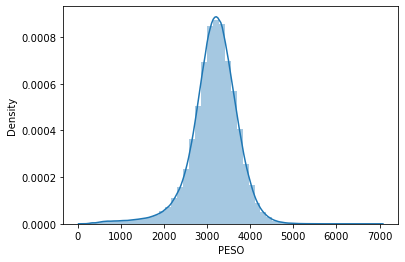

In [21]:
df = df[df['PESO']!=9999]

# Lets see the difference in the target distribution after removing those.
sns.distplot(df['PESO'])
print(' Peso (Weight) < 2500 gramas : ', len(df[df['BPN'] == 1]))
print(' Peso (Weight) > 2500 gramas : ', len(df[df['BPN'] == 0]))
print(' Abaixo do Peso (Below Loweight) % : ', (len(df[df['BPN'] == 1])/len(df)) * 100)
print(' Peso Normal ( Normal weight ) % : ', (len(df[df['BPN'] == 0])/len(df)) * 100)

Some of the features which contain '99' '999' '9999' (which is the number choose in the when this feature was ignored on survey) is okay to let it out how it is because its cateogrical variables, but for continous variables this have to be fixed.

In [22]:
# replacing 
df['IDADEMAE'].replace(99,df['IDADEMAE'].mode()[0],inplace=True)
df['QTDFILVIVO'].replace(99,df['QTDFILVIVO'].mode()[0],inplace=True)
df['QTDFILMORT'].replace(99,df['QTDFILMORT'].mode()[0],inplace=True)
df['ESCMAE2010'].replace(99,9,inplace=True) # Replacing for the 'ignored' alternative
df['QTDGESTANT'].replace(99,df['QTDGESTANT'].mode()[0],inplace=True)
df['QTDPARTNOR'].replace(99,df['QTDPARTNOR'].mode()[0],inplace=True)
df['QTDPARTCES'].replace(99,df['QTDPARTCES'].mode()[0],inplace=True)
df['IDADEPAI'].replace(99,df['IDADEPAI'].mode()[0],inplace=True)
df['CONSPRENAT'].replace(99,df['CONSPRENAT'].mode()[0],inplace=True)
df['MESPRENAT'].replace(99,df['MESPRENAT'].mode()[0],inplace=True)

In [23]:
#Since all of that has been cleaned up, it is time to do some more feature engineering by finally dividing quantitative features into categorical.

df['IDADEMAE_band'] = pd.cut(df['IDADEMAE'],5,labels=[1,2,3,4,5])
df['IDADEPAI_band'] = pd.cut(df['IDADEPAI'],5,labels=[1,2,3,4,5])
df['QTDFILVIVO_band'] = pd.cut(df['QTDFILVIVO'],3,labels=[1,2,3])
df['QTDFILMORT_band'] = pd.cut(df['QTDFILMORT'],3,labels=[1,2,3])
df['DIFDATA_band'] = pd.cut(df['DIFDATA'],5,labels=[1,2,3,4,5])
df['QTDGESTANT_band'] = pd.cut(df['QTDGESTANT'],5,labels=[1,2,3,4,5])
df['QTDPARTNOR_band'] = pd.cut(df['QTDPARTNOR'],5,labels=[1,2,3,4,5])
df['QTDPARTCES_band'] = pd.cut(df['QTDPARTCES'],5,labels=[1,2,3,4,5])

Okay The Process of Cleanse is done, now we can prepare the data for the ensenmble and modelling

In [24]:
df.shape

(4214426, 69)

In [25]:
df.drop(['IDADEMAE','IDADEPAI','QTDFILVIVO','QTDFILMORT','DIFDATA','QTDGESTANT','QTDPARTNOR','QTDPARTCES'],axis=1,inplace=True)

In [26]:
df.drop('PESO',axis=1,inplace=True)

## Machine Learning Models

In [27]:
# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
# making the values from 2014 to 2018 as my training set and 2019 and 2020 as my test set

df_train = df[df['ANO']<2019]
df_test = df[df['ANO']>2018]


x_train = df_train.drop('BPN',axis=1)
x_test = df_test.drop('BPN',axis=1)
y_train = df_train['BPN']
y_test = df_test['BPN']


In [29]:
import warnings
from pylab import rcParams
# Magic function para utilizar o matplot
%matplotlib inline
rcParams['figure.figsize'] = 10,6
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

In [32]:
# Gaussian Naive Bayes
clf_gaussian = GaussianNB()
clf_gaussian.fit(x_train, y_train) 
y_pred_gaussian = clf_gaussian.predict(x_test)
y_score_gaussian = clf_gaussian.predict_proba(x_test)[:,1]


acc_gaussian = accuracy_score(y_test,y_pred_gaussian)
mse_gaussian= metrics.mean_squared_error(y_test,y_pred_gaussian)

fpr_gaussian,tpr_gaussian,threshold_gaussian = roc_curve(y_test,y_score_gaussian)
gaussian_auc = roc_auc_score(y_test, clf_gaussian.predict_proba(x_test)[:, 1])

In [33]:
%time
# Decision Tree

clf_decision_tree = DecisionTreeClassifier()
clf_decision_tree.fit(x_train,y_train)

y_pred_decision_tree = clf_decision_tree.predict(x_test)

acc_decision_tree = accuracy_score(y_test,y_pred_decision_tree)
mse_decision_tree= metrics.mean_squared_error(y_test,y_pred_decision_tree)

y_score_decision_tree = clf_decision_tree.predict_proba(x_test)[:,1]

fpr_decision_tree,tpr_decision_tree,threshold_decision_tree = roc_curve(y_test,y_score_decision_tree)

decision_tree_auc = roc_auc_score(y_test, clf_decision_tree.predict_proba(x_test)[:, 1])


CPU times: total: 0 ns
Wall time: 0 ns


In [34]:
%%time

# Random Forest

clf_random_forest = RandomForestClassifier(n_estimators=100)
clf_random_forest.fit(x_train, y_train)

y_pred_random_forest = clf_random_forest.predict(x_test)

acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
mse_random_forest= metrics.mean_squared_error(y_test,y_pred_random_forest)

y_score_random_forest = clf_random_forest.predict_proba(x_test)[:,1]
fpr_random_forest,tpr_random_forest,threshold_random_forest = roc_curve(y_test,y_score_random_forest)

random_forest_auc = roc_auc_score(y_test, clf_random_forest.predict_proba(x_test)[:, 1])

AUC: {0.8825209803278581}
CPU times: total: 39min 27s
Wall time: 39min 36s


In [35]:
%%time

models = pd.DataFrame({
    'Model': [ 'Gaussian Naive Bayes',
              'Decision Tree','Random Forest'],
    'ROC_AUC': [gaussian_auc,decision_tree_auc,
                random_forest_auc],
    'Accuracy': [acc_gaussian,acc_decision_tree,
                 acc_random_forest],
    'MSE':   [mse_gaussian,
              mse_decision_tree,mse_random_forest]})

models.sort_values(by='ROC_AUC', ascending=False)

CPU times: total: 0 ns
Wall time: 2.67 ms


,Model,ROC_AUC,Accuracy,MSE
2,Random Forest,0.882521,0.939511,0.060489
0,Gaussian Naive Bayes,0.793669,0.904936,0.095064
1,Decision Tree,0.712345,0.891438,0.108562


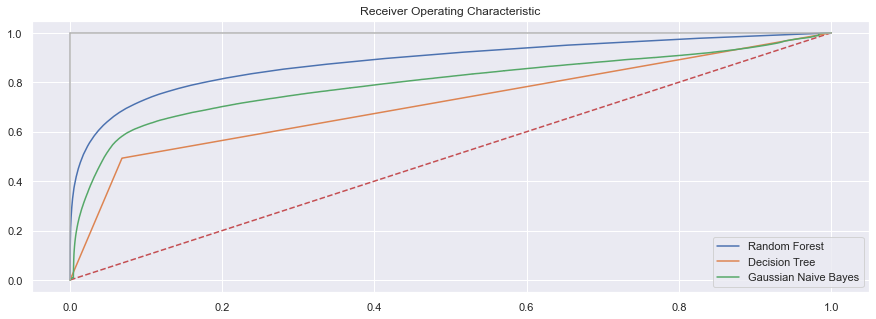

In [36]:
import matplotlib.pyplot as plt

plt.subplots(1,figsize=(15,5))
plt.title('Receiver Operating Characteristic')

plt.plot([0, 1], ls="--",c='r')
plt.plot(fpr_random_forest,tpr_random_forest,label='Random Forest')
plt.plot(fpr_decision_tree,tpr_decision_tree,label='Decision Tree')
plt.plot(fpr_gaussian,tpr_gaussian,label='Gaussian Naive Bayes')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.legend()
plt.show()

To ensure the data is not overfitting i will realizing a cross validation method to check if the results are not diverging

#### Cross validation 

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

x = df.drop('BPN',axis=1)
y = df['BPN']

clf_dtree = DecisionTreeClassifier()

decision_tree_scores = cross_validate(clf_dtree,x,y,cv=3,
                                      scoring=('accuracy','roc_auc','neg_mean_squared_error'),
                                      return_train_score=True)

In [38]:
%%time
clf_rforest = RandomForestClassifier()

random_forest_scores = cross_validate(clf_rforest,x,y,cv=3,
                                      scoring=('accuracy','roc_auc','neg_mean_squared_error'),
                                      return_train_score=True)

CPU times: total: 1h 47min 33s
Wall time: 11h 34s


In [39]:
%%time
clf_gaussianNB = GaussianNB()

gaussian_scores = cross_validate(clf_gaussianNB,x,y,cv=3,
                                      scoring=('accuracy','roc_auc','neg_mean_squared_error'),
                                      return_train_score=True)

CPU times: total: 52.8 s
Wall time: 53 s


In [40]:
gaussianNB_auc = gaussian_scores['test_roc_auc'].mean()
gaussianNB_acc = gaussian_scores['test_accuracy'].mean()
gaussianNB_mse = gaussian_scores['test_neg_mean_squared_error'].mean()


dtree_auc = decision_tree_scores['test_roc_auc'].mean()
dtree_acc = decision_tree_scores['test_accuracy'].mean()
dtree_mse = decision_tree_scores['test_neg_mean_squared_error'].mean()


rforest_auc = random_forest_scores['test_roc_auc'].mean()
rforest_acc = random_forest_scores['test_accuracy'].mean()
rforest_mse = random_forest_scores['test_neg_mean_squared_error'].mean()



In [41]:
%%time

models = pd.DataFrame({
    'Model': [ 'Gaussian Naive Bayes',
              'Decision Tree','Random Forest'],
    'ROC_AUC': [gaussianNB_auc,dtree_auc,
                rforest_auc],
    'Accuracy': [gaussianNB_acc,dtree_acc,
                 rforest_acc],
    'MSE':   [gaussianNB_mse,
              dtree_mse,rforest_mse]})

models.sort_values(by='ROC_AUC', ascending=False)

CPU times: total: 31.2 ms
Wall time: 29.1 ms


,Model,ROC_AUC,Accuracy,MSE
2,Random Forest,0.876060,0.939084,-0.060916
0,Gaussian Naive Bayes,0.785203,0.905195,-0.094805
1,Decision Tree,0.706179,0.886326,-0.113674
